In [1]:
# Instal library yang dibutuhkan untuk YOLOv5 dan pemrosesan video
!pip install torch torchvision torchaudio  # PyTorch untuk menjalankan model YOLO
!pip install opencv-python-headless  # OpenCV untuk memproses video
!pip install yolov5  # YOLOv5 repository, menyediakan model dan fungsi deteksi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 6.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=0ae9bbdd1f7cf856a6fa28b7c3d773ba4a3c28c05c8941dd7d43d4a24254775f
  Stored in direct

In [4]:
# Upload file video
from google.colab import files
uploaded = files.upload()

Saving 4K Road traffic video for object detection and tracking - free download now!.mp4 to 4K Road traffic video for object detection and tracking - free download now! (1).mp4


In [5]:
# Memuat model YOLOv5
import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # Memuat model YOLOv5 kecil yang pre-trained

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-11-2 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 119MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [11]:
import cv2

# Memuat video
cap = cv2.VideoCapture('/content/4K Road traffic video for object detection and tracking - free download now! (1).mp4')  # Ganti dengan path ke video Anda

while cap.isOpened():
    ret, frame = cap.read()  # Membaca frame video
    if not ret:
        break

    # Melakukan deteksi objek dengan YOLOv5 pada frame
    results = model(frame)  # Melakukan inferensi YOLO pada frame

    # Mendapatkan hasil deteksi sebagai DataFrame
    detections = results.pandas().xyxy[0]  # Mengambil bounding box dan label objek

    # Menormalkan koordinat bounding box dan memberikan ID unik untuk pelacakan
    if not detections.empty:
        detections['normalized_xmin'] = detections['xmin'] / frame.shape[1]
        detections['normalized_ymin'] = detections['ymin'] / frame.shape[0]
        detections['normalized_xmax'] = detections['xmax'] / frame.shape[1]
        detections['normalized_ymax'] = detections['ymax'] / frame.shape[0]
        detections['object_id'] = range(len(detections))  # Memberikan ID unik ke objek yang terdeteksi

        # Mengiterasi objek yang terdeteksi dan menggambar bounding box
        for idx, detection in detections.iterrows():
            xmin, ymin, xmax, ymax = detection[['xmin', 'ymin', 'xmax', 'ymax']]
            label = detection['name']
            confidence = detection['confidence']

            # Menggambar bounding box pada frame
            cv2.rectangle(frame, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255, 0, 0), 2)
            cv2.putText(frame, f"{label} {confidence:.2f}", (int(xmin), int(ymin) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

Streaming output truncated to the last 5000 lines.
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


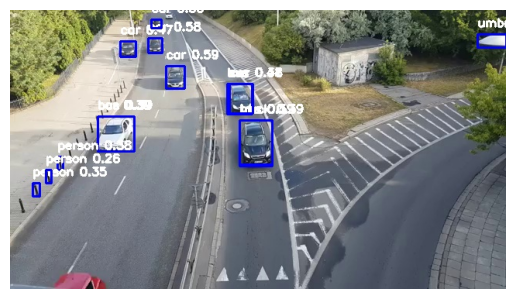

In [18]:
import cv2
import matplotlib.pyplot as plt

# Membuka video
cap = cv2.VideoCapture('/content/4K Road traffic video for object detection and tracking - free download now! (1).mp4')  # Ganti dengan path ke video Anda

while cap.isOpened():
    ret, frame = cap.read()  # Membaca frame video
    if not ret:
        break

    # Melakukan deteksi objek dengan YOLOv5 pada frame
    results = model(frame)  # Melakukan inferensi YOLO pada frame

    # Mendapatkan hasil deteksi sebagai DataFrame
    detections = results.pandas().xyxy[0]  # Mengambil bounding box dan label objek

    # Menormalkan koordinat bounding box dan memberikan ID unik untuk pelacakan
    if not detections.empty:
        detections['normalized_xmin'] = detections['xmin'] / frame.shape[1]
        detections['normalized_ymin'] = detections['ymin'] / frame.shape[0]
        detections['normalized_xmax'] = detections['xmax'] / frame.shape[1]
        detections['normalized_ymax'] = detections['ymax'] / frame.shape[0]
        detections['object_id'] = range(len(detections))  # Memberikan ID unik ke objek yang terdeteksi

        # Mengiterasi objek yang terdeteksi dan menggambar bounding box
        for idx, detection in detections.iterrows():
            xmin, ymin, xmax, ymax = detection[['xmin', 'ymin', 'xmax', 'ymax']]
            label = detection['name']
            confidence = detection['confidence']

            # Menggambar bounding box pada frame
            cv2.rectangle(frame, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255, 0, 0), 2)
            cv2.putText(frame, f"{label} {confidence:.2f}", (int(xmin), int(ymin) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Simpan frame dengan deteksi sebagai gambar
    cv2.imwrite('predictions.jpg', frame)
    break  # Hanya simpan satu frame untuk ditampilkan, hapus atau ubah jika ingin memproses semua frame

# Menampilkan gambar hasil prediksi di Google Colab
img = cv2.imread('predictions.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Mengonversi dari BGR ke RGB untuk ditampilkan dengan benar

plt.imshow(img_rgb)
plt.axis('off')  # Menghilangkan sumbu untuk tampilan yang lebih bersih
plt.show()